# Bike Sharing

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

## Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal: 
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.


### Step 1: Import Necessary Python Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

import warnings 
warnings.filterwarnings('ignore')

### Step 2: Importing the Data

In [2]:
#Reading the data from csv file
data = pd.read_csv("day.csv")

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Data description:**
From Readme.txt file 

- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [4]:
#Checking the shape of the data
data.shape

(730, 16)

**Insight:** We have dataset of 730 rows and  16 columns.

In [5]:
#check dataframe's null values and datatypes. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#checking the details of the numerical data
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
data.duplicated().sum()

0

#### Insight:
- Except  dteday  column, all other are either float or integer type.

- There are some fields that are categorical in nature, but are in integer/float type. Example : season, mnth, weathersit etc.

-  There were not any duplicate values in the dataset.

We will have to analyze and decide whether to convert them to categorical or treat as integer.

#### Cleaning the data

<function matplotlib.pyplot.show(close=None, block=None)>

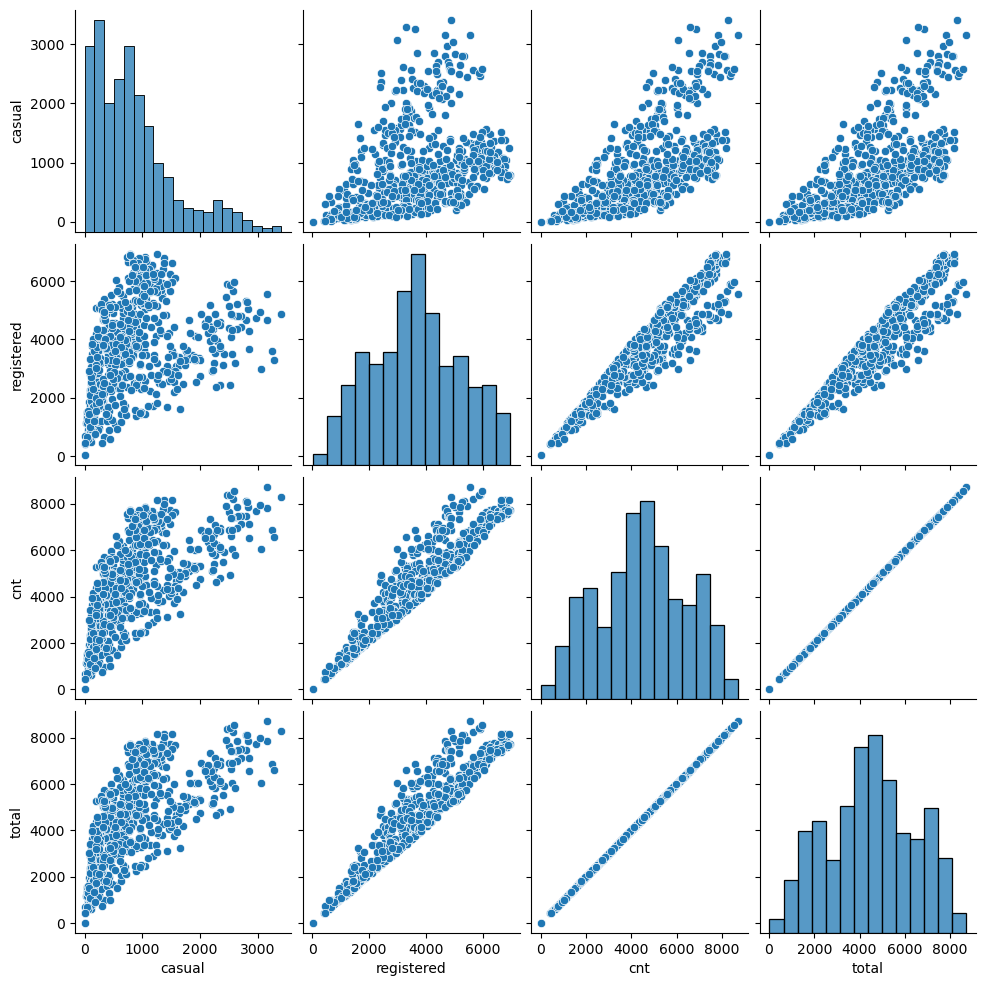

In [10]:
# Checking the relationship between casual, registered and cnt column
data_cnt = data[['casual','registered','cnt']]
# Creating a column whch will show the value of casual + registered
data_cnt['total'] = data_cnt['casual'] + data_cnt ['registered']
sns.pairplot(data_cnt)
plt.show

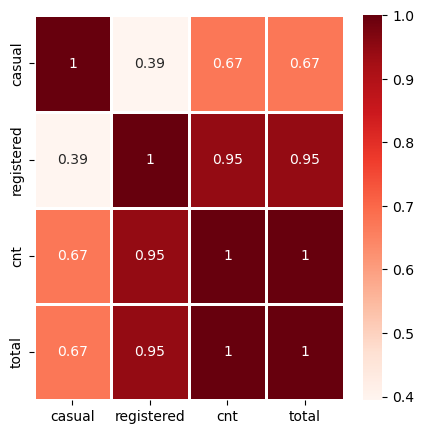

In [11]:
# checking the correlation of the variables 
plt.figure(figsize = (5,5))
ax= sns.heatmap(data_cnt.corr(), annot = True, cmap="Reds",linewidth =1)
plt.show()

**So based ond the above analysis the following variables can be removed from further analysis -**

- instant: It is only an index value
- dteday: This has the date, Since we already have separate columns for 'year' & 'month' we don't need this column
- casual & registered: Both these columns contains the count of bike booked by different categories of customers. From the pairplot as well as the correlation heatmap, we can concur that total bike rental value 'cnt = 'casual' + 'registered'. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

In [12]:
# dropping the unwanted columns
# Droping instant column as it is index column which is of no use
# Dropping dteday as we have already have month and weekday columns to work with
# Dropping casual and registered columns as as we have cnt column which is sum of the both that is the target column

data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [13]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Step 3: Encoding & Visualising the Data

#### Encoding Categorical columns 

Converting season, mnth,weathersit and weekday to categorical columns

- **season:** converting season values as per criteria - 1:Spring, 2:Summer, 3:Fall, 4:Winter
- **mnth:** converting mnth values as 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
- **weathersit:** converting weathersit values as 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
- **weekday:** converting weekday values as 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat

In [14]:
#Converting the features season, month, weekday and weathersit values into categorical string values.

data.season = data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}) 
data.month = data.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}) 
data.weekday = data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})  
data.weathersit = data.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [15]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


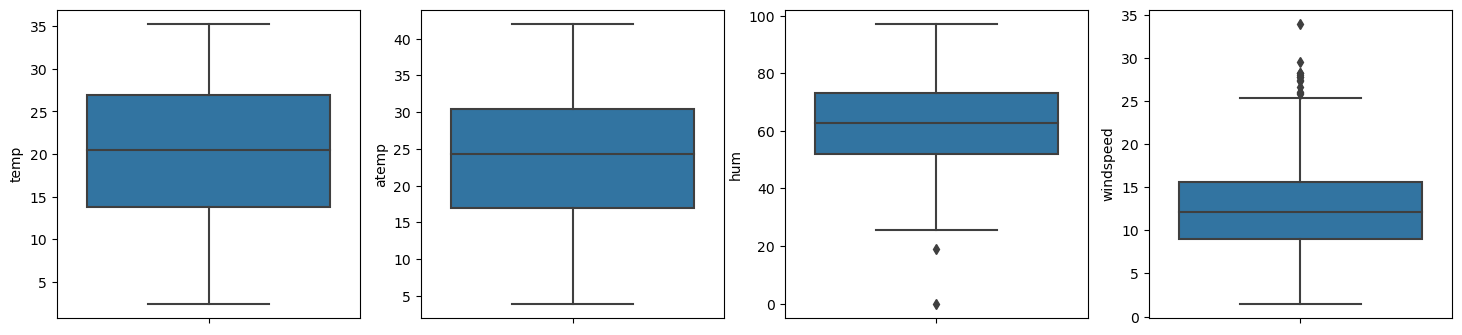

In [17]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=data)
    i+=1

**Insight:** From these plots, we can conclude that there are no outliers to be handled. 

### Visualizing the data

In [18]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

#### Analyzing the numeric variables

<Figure size 1500x3000 with 0 Axes>

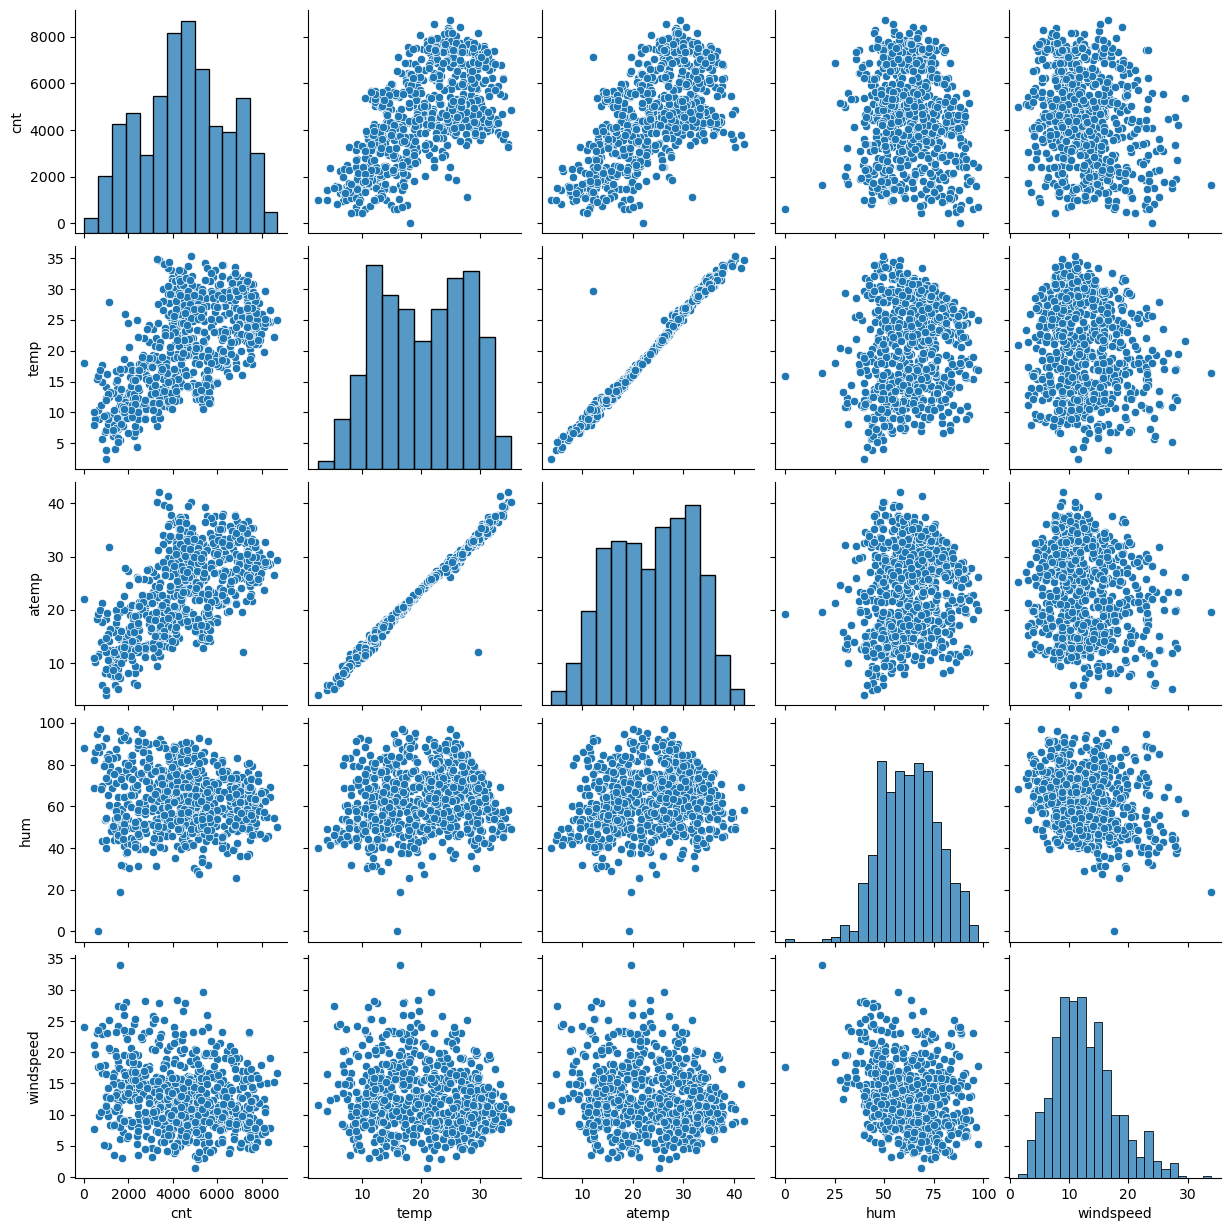

In [19]:
#pairplots for continuous numeric variables 

plt.figure(figsize = (15,30))
sns.pairplot(data=data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

**Insight:**
temp and atemp are highly correlated to each other which is obvious

We can aso see that temp and atemp are more correlated to target variable than other variables.

<Figure size 2000x1500 with 0 Axes>

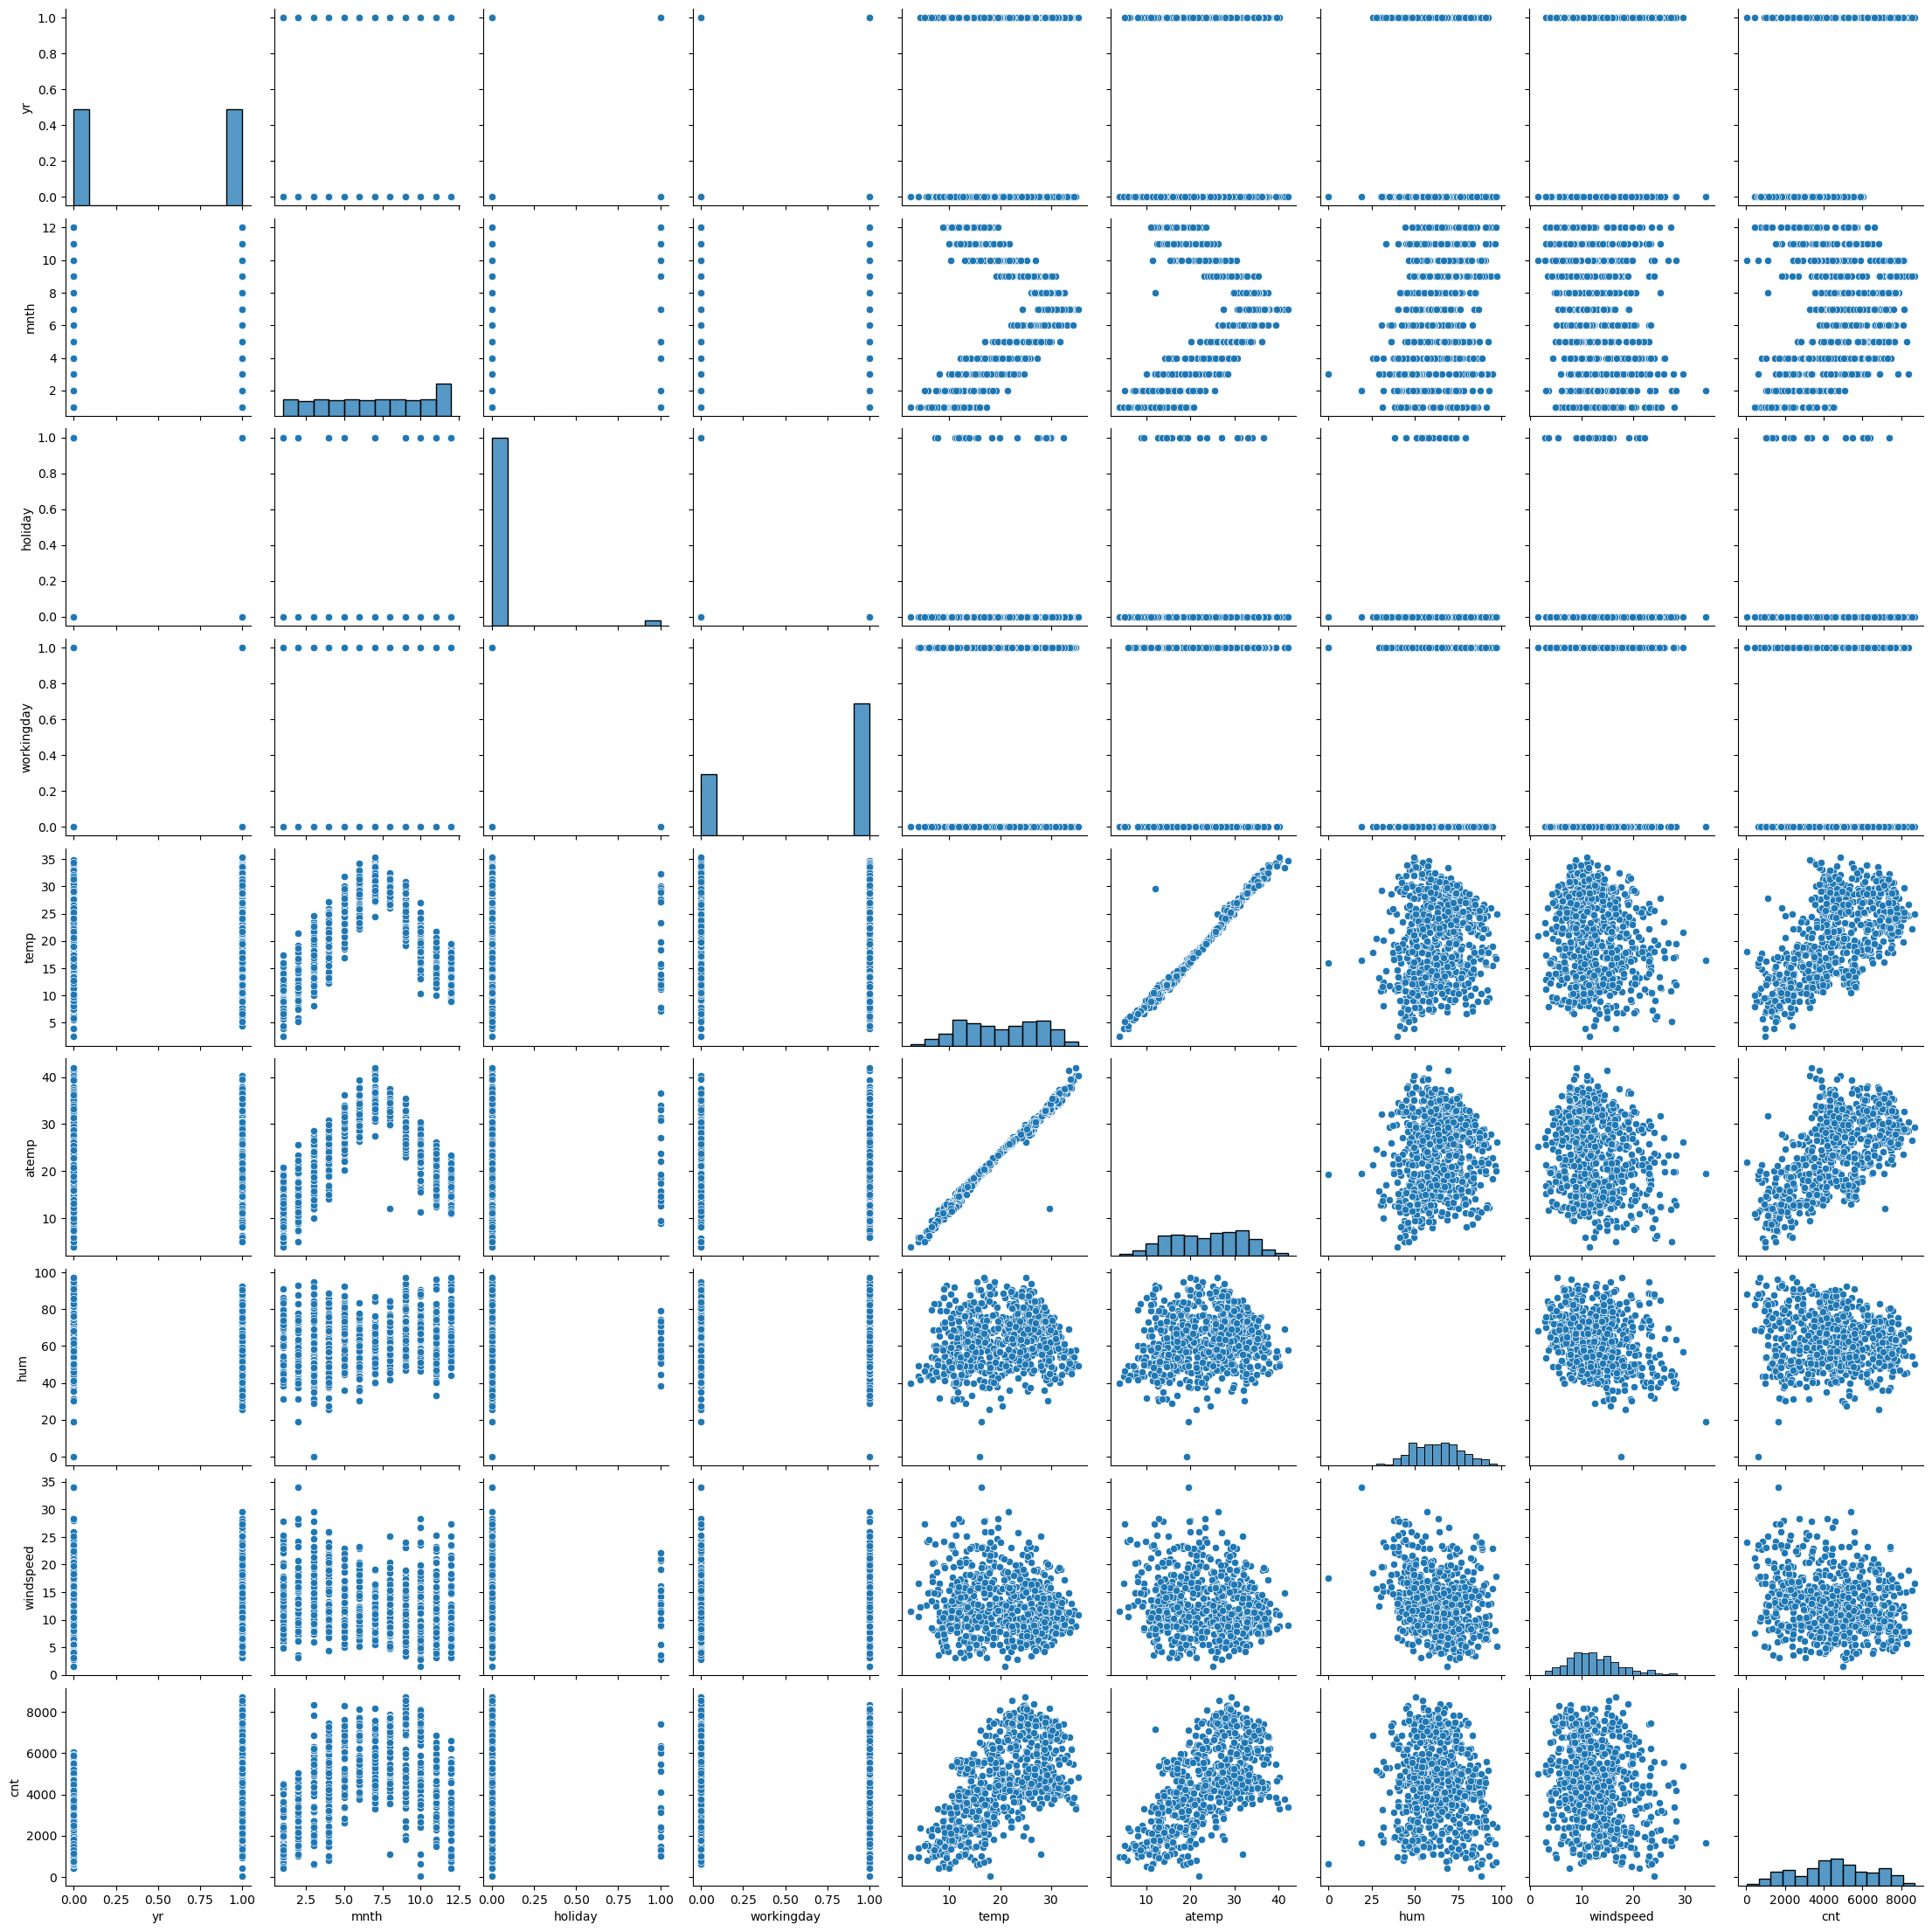

In [20]:
#Visualising the Data to Find the Correlation between all the Numerical Variables

plt.figure(figsize=(20,15))
sns.pairplot(data)
plt.show()

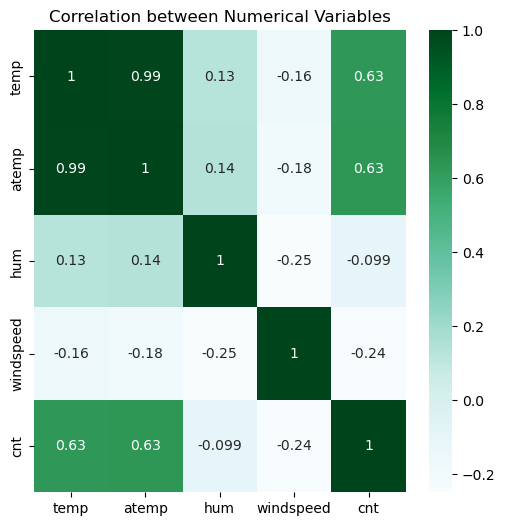

In [21]:
# Checking continuous variables relationship with each other
plt.figure(figsize = (6,6))
sns.heatmap(data[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.title("Correlation between Numerical Variables")
plt.show()

**Insight:** temp and atemp has correlation more than .99 means almost 1  and atemp seems to be derived from temp so one of them should be dropped,  will decide using VIF which one to drop.

#### Analyzing the categorical variables

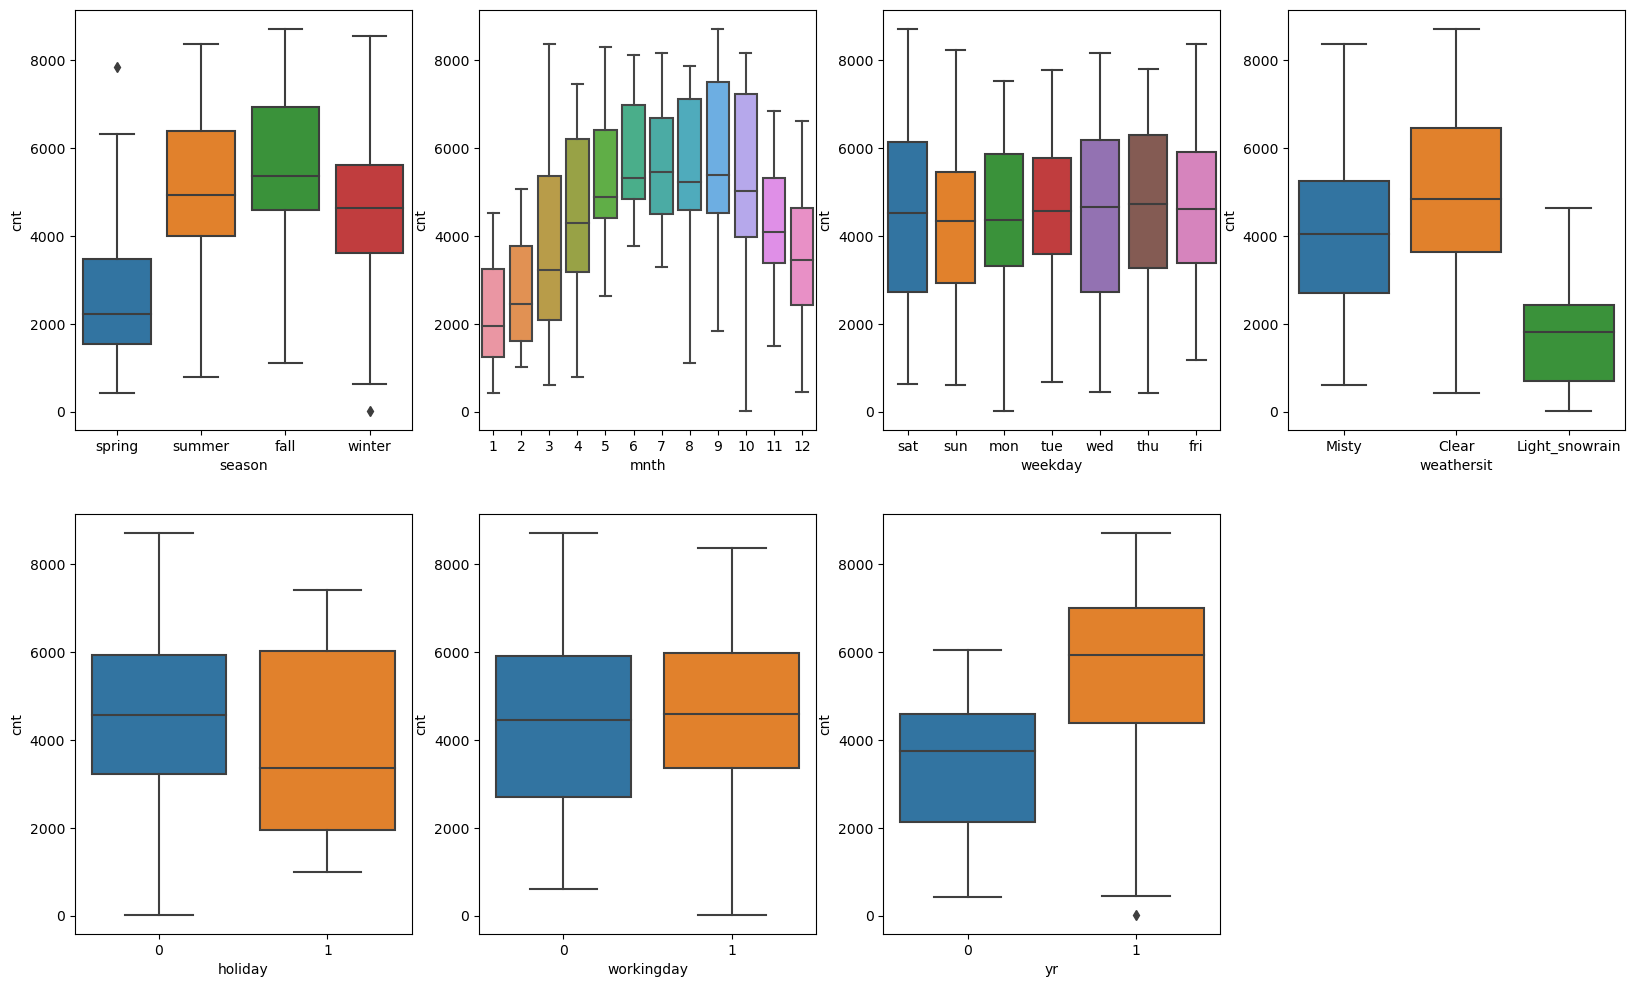

In [22]:
plt.figure(figsize=(20, 12))

# Subplot 1: Season vs. Bike Rentals
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=data)

# Subplot 2: Month vs. Bike Rentals
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=data)

# Subplot 3: Weekday vs. Bike Rentals
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=data)

# Subplot 4: Weather Situation vs. Bike Rentals
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=data)

# Subplot 5: Holiday vs. Bike Rentals
plt.subplot(2, 4, 5)
sns.boxplot(x='holiday', y='cnt', data=data)

# Subplot 6: Working Day vs. Bike Rentals
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=data)

# Subplot 7: Year vs. Bike Rentals
plt.subplot(2, 4, 7)
sns.boxplot(x='yr', y='cnt', data=data)

# Display the subplots
plt.show()


**Insights:**    
1. fall has highest demand for rental bikes
2. Demand is growing each month till June. September month has highest demand. After September, demand is decreasing.
3. Weekday is not giving clear picture abount demand but at saturdays demand is slightly high.
4. The clear weathershit has highest demand
5. When there is a holiday, demand has decreased.
6. Demand for year 2019 year has grown

In [23]:
# function to generate statistics related to Categorical Variables
def categorical_stats(col):
    # Grouping the DataFrame by the specified categorical column
    cat_grouped = data.groupby(col)['cnt'].agg(['sum', 'mean', 'count']).sort_values('sum', ascending=False)
    
    # Calculating sum percentage and count percentage
    cat_grouped['sum_perc'] = (cat_grouped['sum'] / data['cnt'].sum()) * 100
    cat_grouped['count_perc'] = (cat_grouped['count'] / data['cnt'].count()) * 100
    
    # Rounding the DataFrame to two decimal places
    cat_grouped = cat_grouped.round(2)
    
    return cat_grouped

In [24]:
# function to generate plots related to Categorical Variables
def categorical_plot(column, figsize_x, figsize_y):

    plt.figure(figsize=(figsize_x, figsize_y))
    
    # Subplot 1: Bar plot
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=data, palette='Set1')
    
    # Subplot 2: Bar plot with hue
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=data, hue='yr', palette='Set2')
    plt.legend(labels=['2018', '2019'])
    
    return
    # Show the plots
    plt.show()

**1. Season :**

In [25]:
categorical_stats('season')

,sum,mean,count,sum_perc,count_perc
season,,,,,
fall,1061129,5644.30,188,32.24,25.75
summer,918589,4992.33,184,27.91,25.21
winter,841613,4728.16,178,25.57,24.38
spring,469514,2608.41,180,14.27,24.66


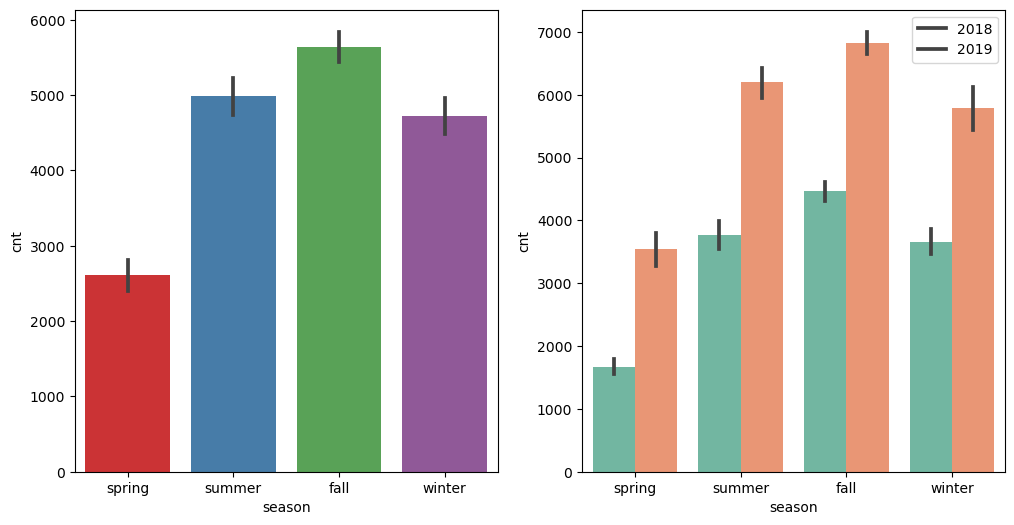

In [26]:
categorical_plot('season',12,6)

**Insight**: Fall emerges as the peak season for bike rentals, exhibiting the highest total counts and average rentals among seasons. This trend suggests a strong preference for biking during autumn, aligning with seasonal patterns and demand fluctuations.

**2. Month :**

In [27]:
categorical_stats('mnth')

,sum,mean,count,sum_perc,count_perc
mnth,,,,,
8,351194,5664.42,62,10.67,8.49
6,346342,5772.37,60,10.52,8.22
9,345991,5766.52,60,10.51,8.22
7,344948,5563.68,62,10.48,8.49
5,331686,5349.77,62,10.08,8.49
10,322352,5199.23,62,9.80,8.49
4,269094,4484.90,60,8.18,8.22
11,254831,4247.18,60,7.74,8.22
3,228920,3692.26,62,6.96,8.49


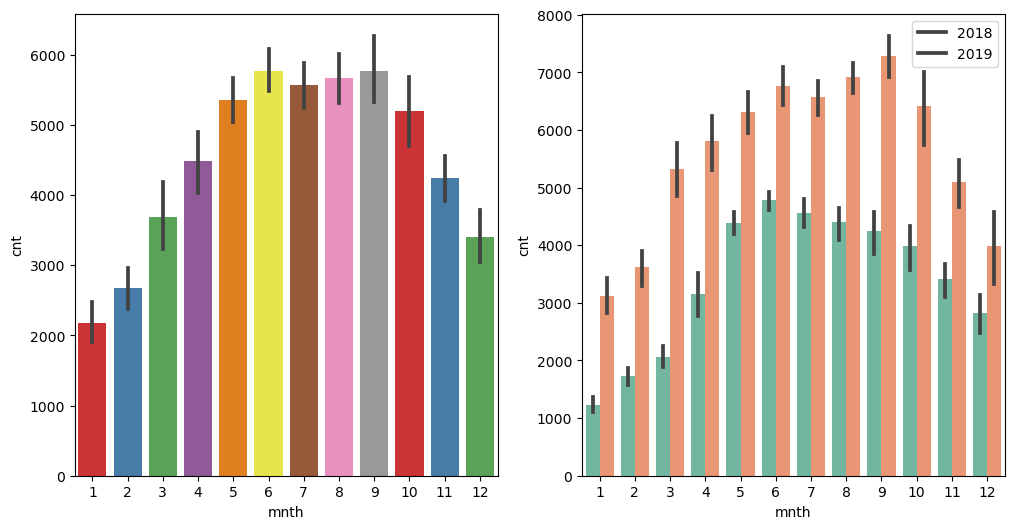

In [28]:
categorical_plot('mnth',12,6)

**Insight:** During summer and autumn (Jun-Sep), bike rentals peak, with August exhibiting the highest counts and mean rentals. Conversely, January and February witness the lowest demand, reflecting seasonal variations and weather influences on biking preferences.

**3. Weather :**

In [29]:
categorical_stats('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Misty,995024,4044.81,246,30.24,33.70
Light_snowrain,37869,1803.29,21,1.15,2.88


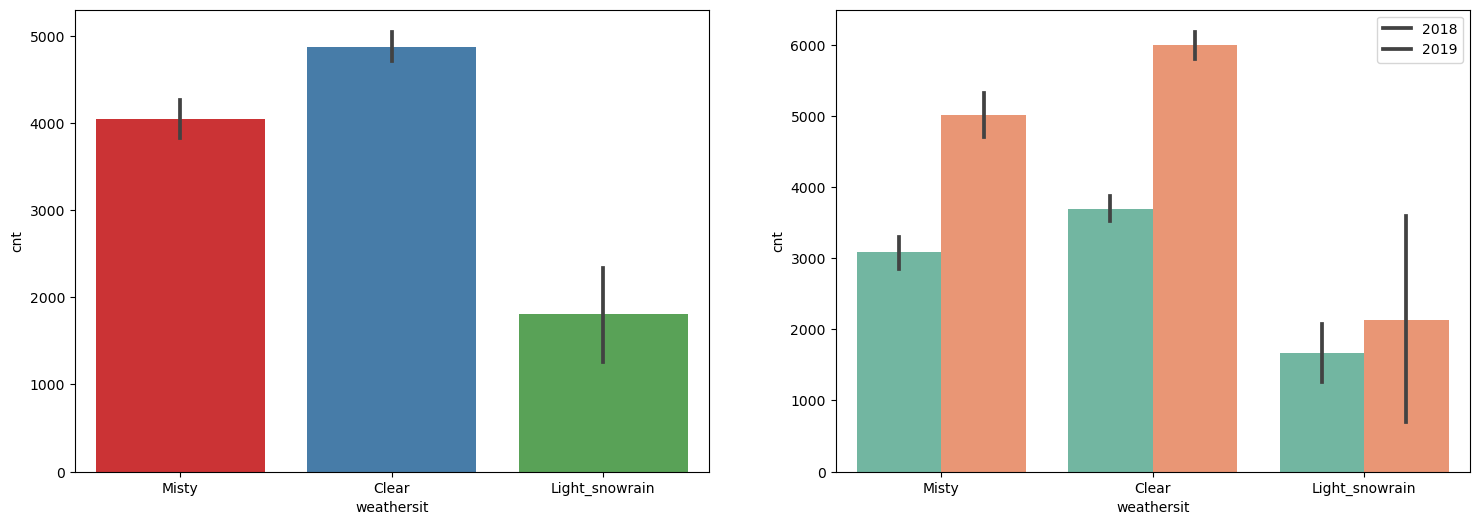

In [30]:
categorical_plot('weathersit',18,6)

**Insight:**  The data reveals that the majority of bike rentals occur during clear weather conditions, constituting over two-thirds of total rentals. Misty weather follows with moderate rentals, while light rain or snow conditions have minimal impact on rental frequency.

**4. Weekday :**

In [31]:
categorical_stats('weekday')

,sum,mean,count,sum_perc,count_perc
weekday,,,,,
fri,487790,4690.29,104,14.82,14.25
thu,485395,4667.26,104,14.75,14.25
sat,477807,4550.54,105,14.52,14.38
wed,471214,4574.89,103,14.32,14.11
tue,469109,4510.66,104,14.25,14.25
mon,455503,4338.12,105,13.84,14.38
sun,444027,4228.83,105,13.49,14.38


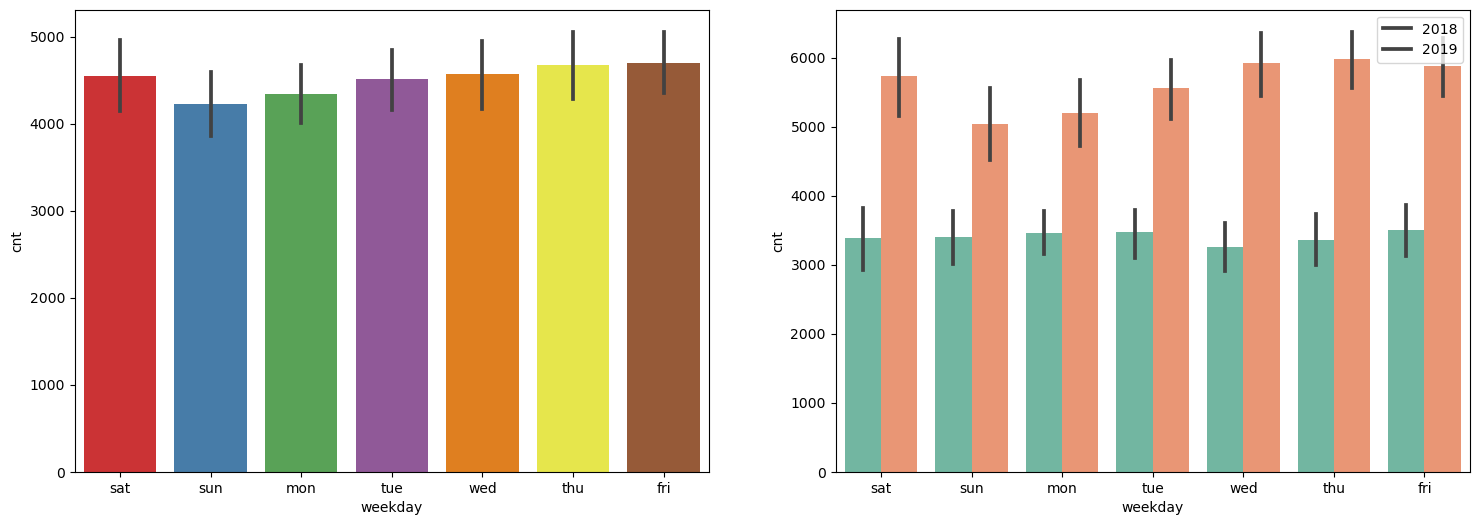

In [32]:
categorical_plot('weekday',18,6)

**Insight :** Bike rentals demonstrate a consistent pattern throughout the weekdays, with Friday and Thursday recording the highest counts, closely followed by Saturday and Wednesday. Monday and Sunday witness the lowest rental counts.

**5. Holiday :**

In [33]:
categorical_stats('holiday')

,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


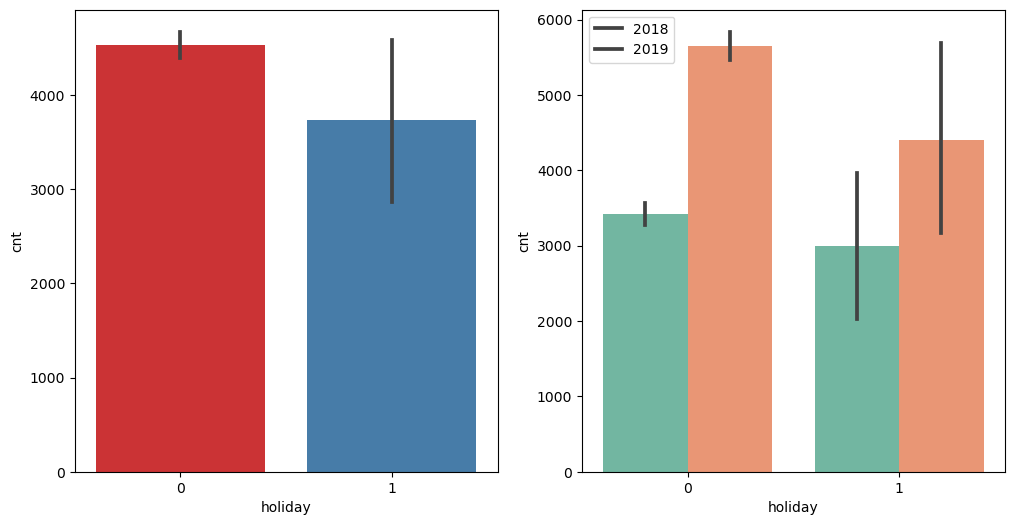

In [34]:
categorical_plot('holiday',12,6)

**Insight :** Most bike rentals occur on non-holiday days, comprising over 97% of the total counts. Conversely, holidays contribute only around 2.38% to the total counts, with notably lower rental averages.

**6. Working Day :**

In [35]:
categorical_stats('workingday')

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2290576,4590.33,499,69.6,68.36
0,1000269,4330.17,231,30.4,31.64


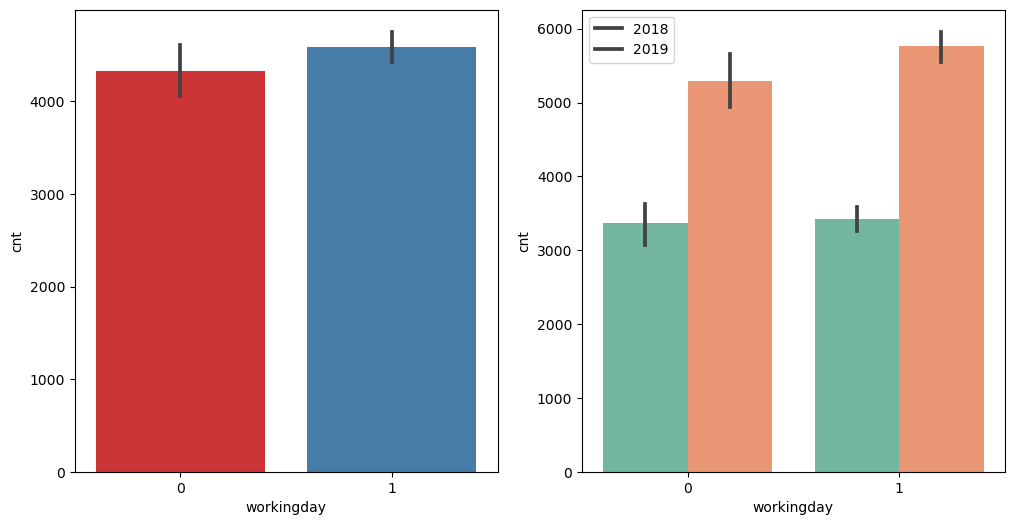

In [36]:
categorical_plot('workingday',12,6)

**Insight :** On working days, bike rentals dominate, constituting approximately 69.6% of total counts, with a higher mean count compared to non-working days, which represent about 30.4% of total counts.

**7. Year :**

In [37]:
categorical_stats('yr')

,sum,mean,count,sum_perc,count_perc
yr,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


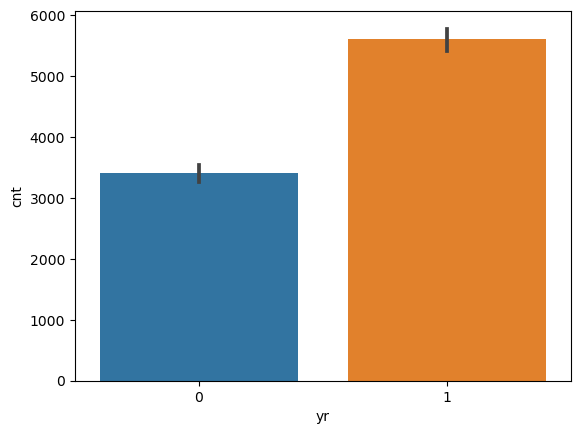

In [38]:
sns.barplot(x='yr', y='cnt', data=data)
plt.show()

**Insight :** Bike rental demand has increased from 2018 to 2019

### Step : 4 Data Preparation

**Creating Dummy Variable for catagorical columns**

In [39]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(data.month,drop_first=True)
weekdays_df=pd.get_dummies(data.weekday,drop_first=True)
weathersit_df=pd.get_dummies(data.weathersit,drop_first=True)
seasons_df=pd.get_dummies(data.season,drop_first=True)

In [40]:
# Convert boolean values to integers (0s and 1s)

months_df = months_df.astype(int)  
weekdays_df = weekdays_df.astype(int) 
weathersit_df = weathersit_df.astype(int) 
seasons_df = seasons_df.astype(int) 

In [41]:
# Merging  the dataframe, with the dummy variable dataset. 
df_new = pd.concat([data,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [42]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [43]:
df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [44]:
# check the shape of new dataframe
df_new.shape

(730, 30)

### Step 5: Splitting the data into Training & Testing Sets

In [45]:
# splitting the dataset in training and testing dataset
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [46]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [47]:
# Using MinMaxScaler to Rescale the features
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [48]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [49]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


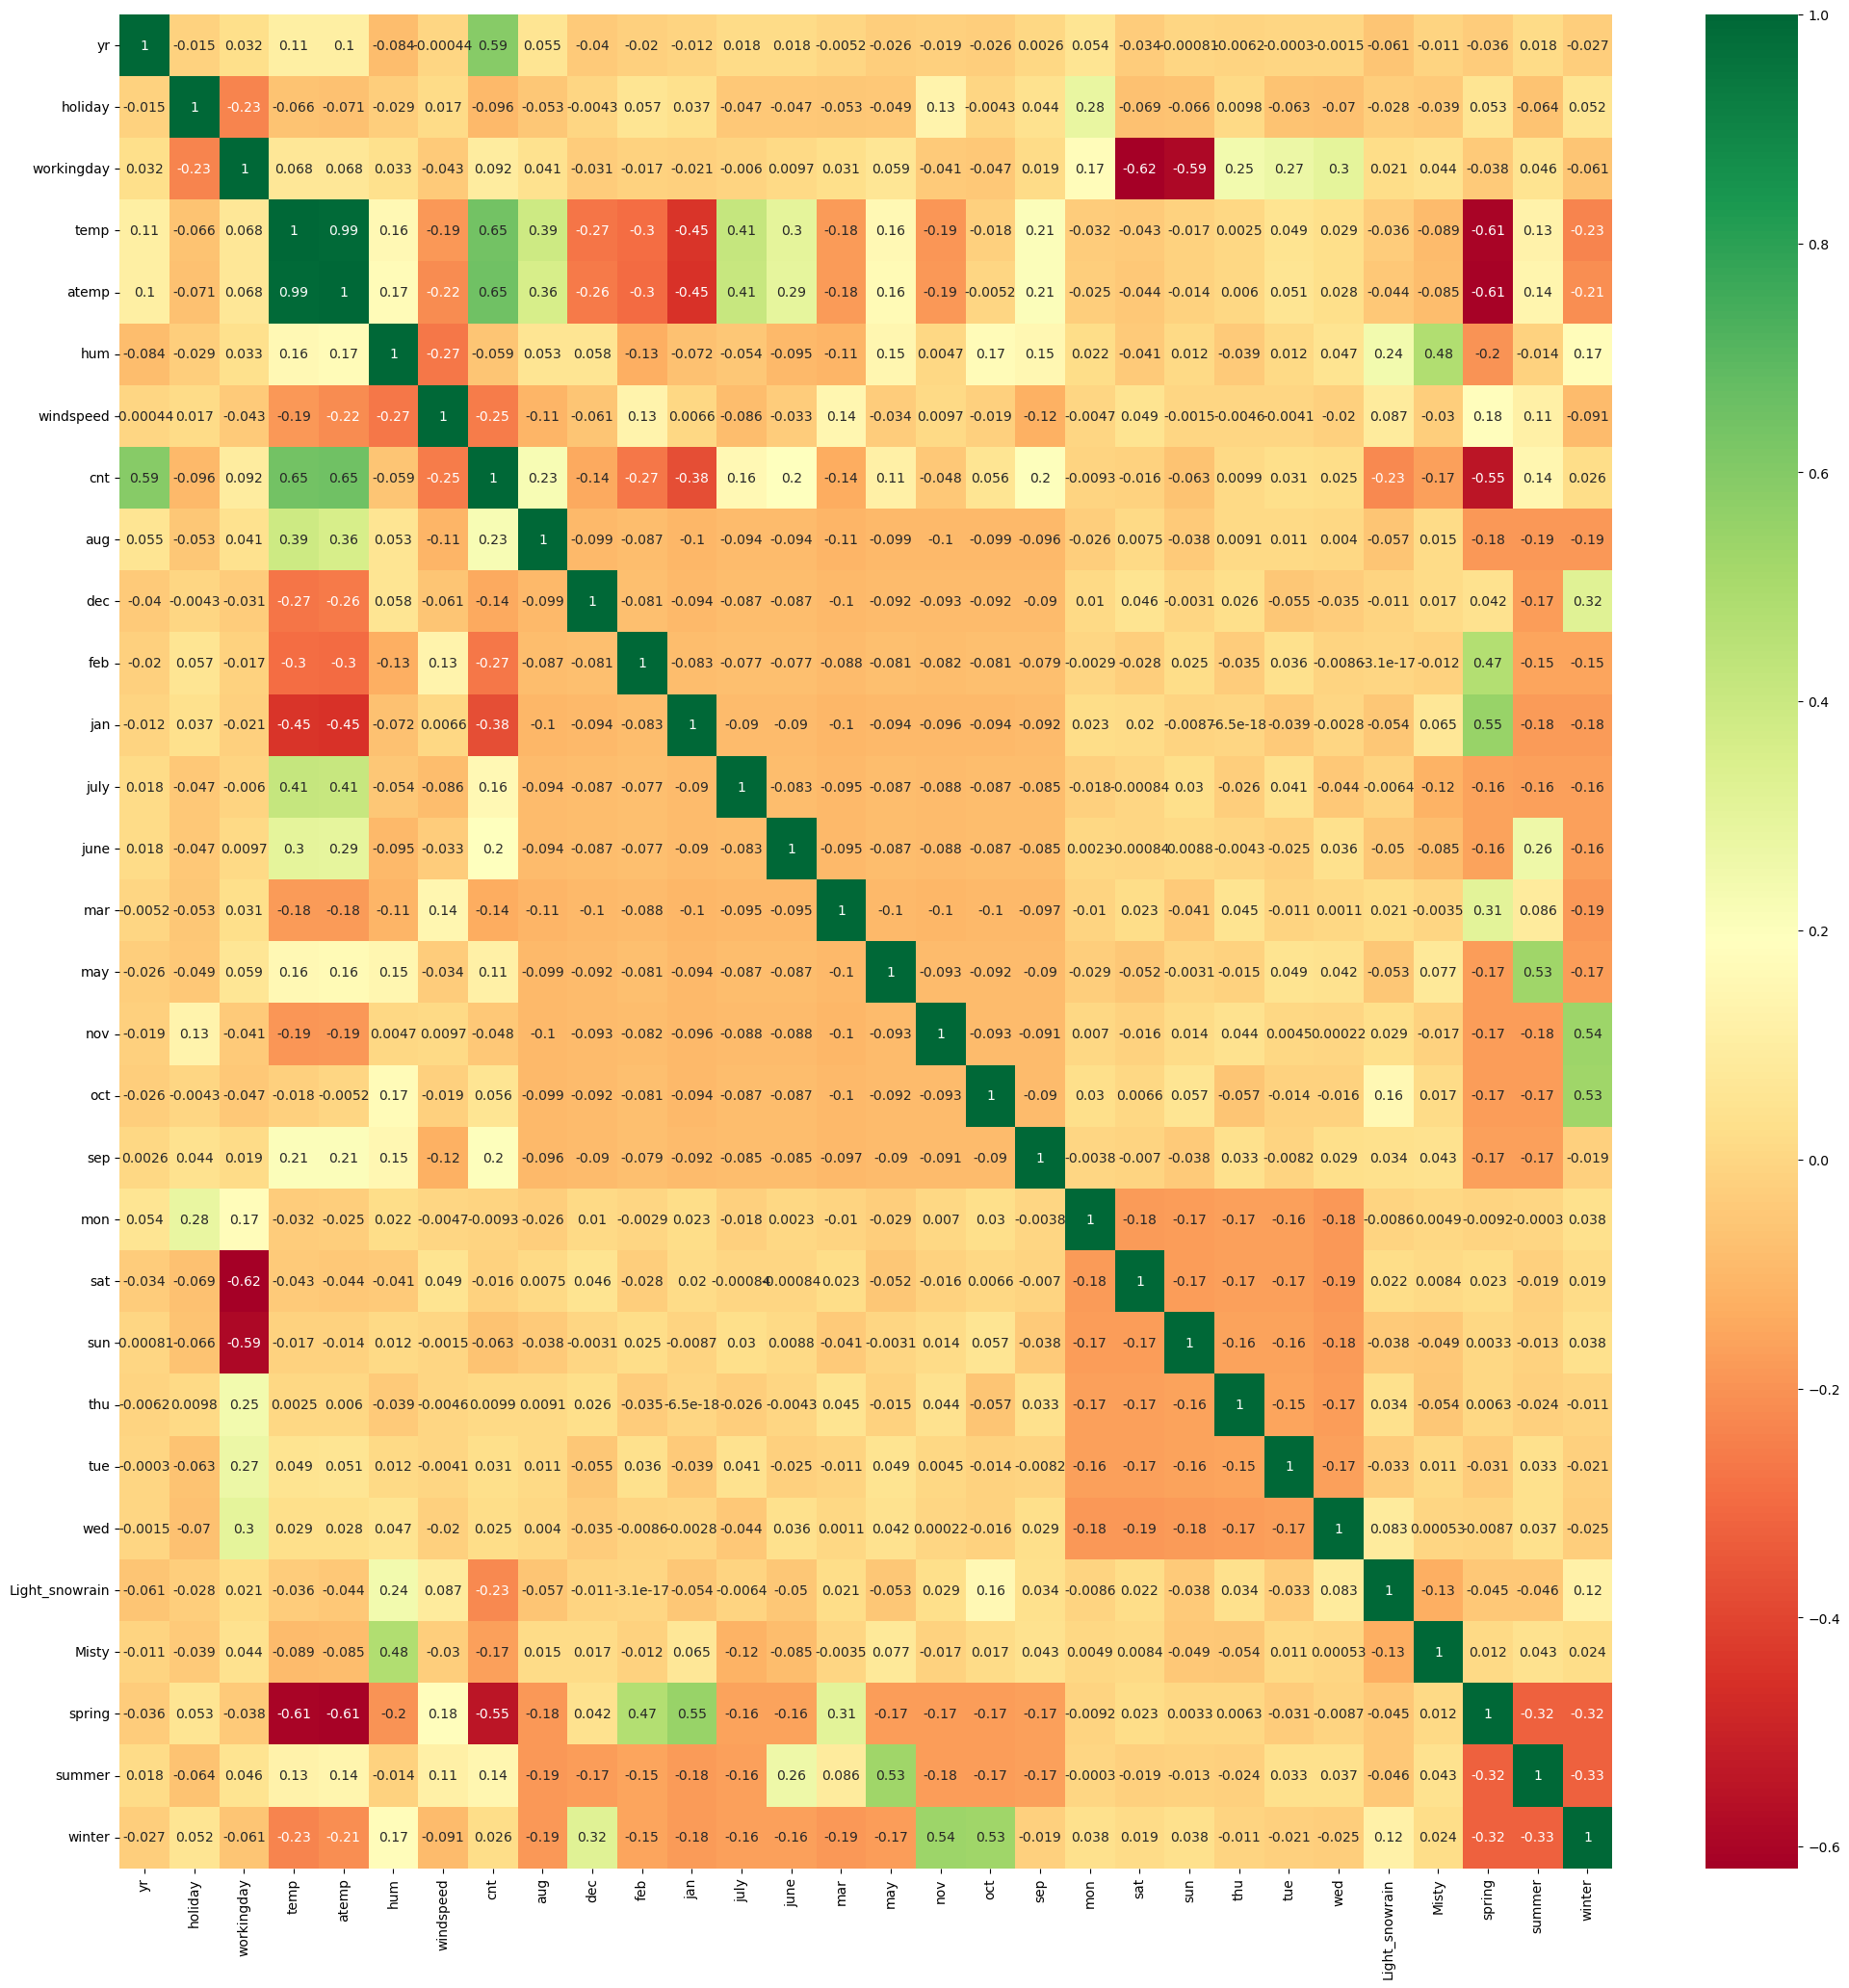

In [50]:
plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

**Insight:** cnt have good correlation with year variable and temp. Similarly, Misty and humidity also show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

#### Dividing into X and Y sets for the model building

In [51]:
y_train = df_train.pop('cnt')
X_train = df_train

### Step 6: Building the Linear Model 
we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE 

#### Using RFE to eliminate some columns

In [52]:
# Build a Lienar Regression model using SKLearn for RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [53]:
# Recursive feature elimination 
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [54]:
#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 14),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', False, 12),
 ('june', False, 13),
 ('mar', False, 15),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 7),
 ('sep', True, 1),
 ('mon', False, 6),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 10),
 ('tue', False, 8),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [55]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan', 'sep',
       'sat', 'sun', 'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')


In [56]:
# rejected columns
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'july', 'june', 'mar', 'may', 'nov',
       'oct', 'mon', 'thu', 'tue', 'wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [57]:
#function for variance inflation factor
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [58]:
# dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [59]:
# calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,51.67
8,sat,12.42
9,sun,11.94
12,spring,4.89
3,temp,3.79
14,winter,3.39
1,holiday,2.95
13,summer,2.32
4,hum,1.91
11,Misty,1.57


In [60]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.6
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.06e-190
Time:                        17:39:20   Log-Likelihood:                 515.25
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     495   BIC:                            -937.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2002      0.028      7.

In [61]:
# As workingday shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,hum,29.24
2,temp,15.42
4,windspeed,4.68
11,spring,4.24
13,winter,3.24
12,summer,2.47
10,Misty,2.30
0,yr,2.09
5,jan,1.66
6,sep,1.28


In [62]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.6
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.06e-190
Time:                        17:39:20   Log-Likelihood:                 515.25
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     495   BIC:                            -937.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2843      0.035      8.

In [63]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'jan', 'sep', 'sat', 'sun',
       'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [64]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['hum'], axis = 1)

In [65]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'jan', 'sep', 'sat', 'sun',
       'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [66]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.64
2,temp,3.98
10,spring,2.67
0,yr,2.07
11,summer,1.91
12,winter,1.68
4,jan,1.60
9,Misty,1.56
5,sep,1.23
6,sat,1.23


**Insight:** VIF values seems to be good now.

In [67]:
# Building 3nd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     201.3
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          3.23e-188
Time:                        17:39:20   Log-Likelihood:                 507.25
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     496   BIC:                            -927.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2133      0.030      7.

In [68]:
# We can drop sat variable as it has high p-value
X_train_new = X_train_new.drop(['sat'], axis = 1)

# calculating VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.61
2,temp,3.92
9,spring,2.65
0,yr,2.07
10,summer,1.91
11,winter,1.66
4,jan,1.60
8,Misty,1.56
5,sep,1.23
6,sun,1.18


**Insight:** VIF doesnt seems to be affected much

In [69]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     218.0
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          3.52e-189
Time:                        17:39:20   Log-Likelihood:                 506.74
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     497   BIC:                            -932.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2155      0.030      7.

In [70]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# calculating VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.91
0,yr,2.07
8,spring,2.02
9,summer,1.91
10,winter,1.66
7,Misty,1.55
4,sep,1.23
5,sun,1.18
6,Light_snowrain,1.08


In [71]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.2
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          3.23e-189
Time:                        17:39:20   Log-Likelihood:                 503.99
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     498   BIC:                            -933.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1981      0.029      6.

**Insight:** We can cosider the above model as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

Overall model is Significant

In [72]:
lr_5.params

const             0.198086
yr                0.234000
holiday          -0.104300
temp              0.478161
windspeed        -0.148022
sep               0.089359
sun              -0.049479
Light_snowrain   -0.290403
Misty            -0.080899
spring           -0.054372
summer            0.062284
winter            0.096907
dtype: float64

### Step:7 Residual Analysis of the train data and validation

In [73]:
y_train_pred = lr_5.predict(X_train_lm_5)

Text(0.5, 0, 'Errors')

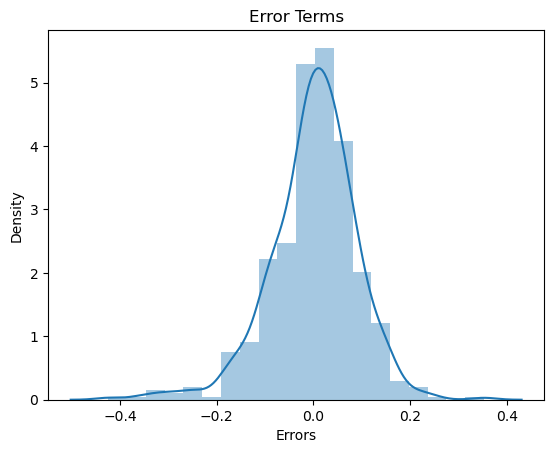

In [74]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms') 
plt.xlabel('Errors')

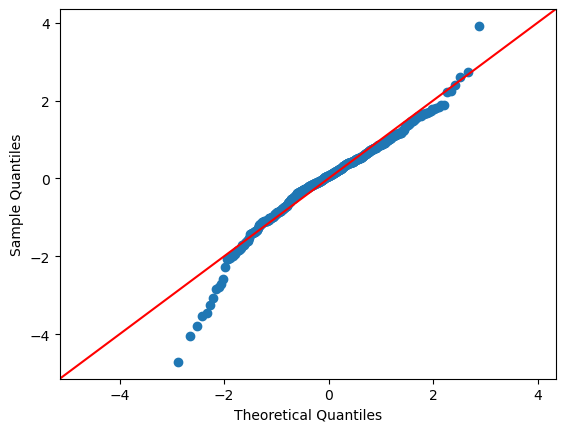

In [75]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

**Insight:** Errors are following the normal distribution

In [76]:
#Checking Multi Colinearity
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.91
0,yr,2.07
8,spring,2.02
9,summer,1.91
10,winter,1.66
7,Misty,1.55
4,sep,1.23
5,sun,1.18
6,Light_snowrain,1.08


**Insight:** VIF values are less than 5 which is good therefore there is no multicolinearity.

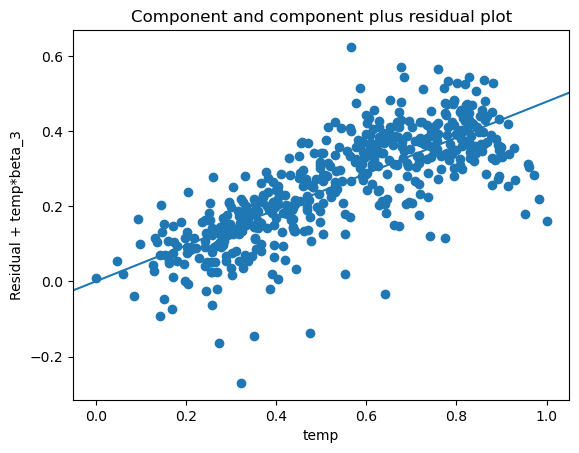

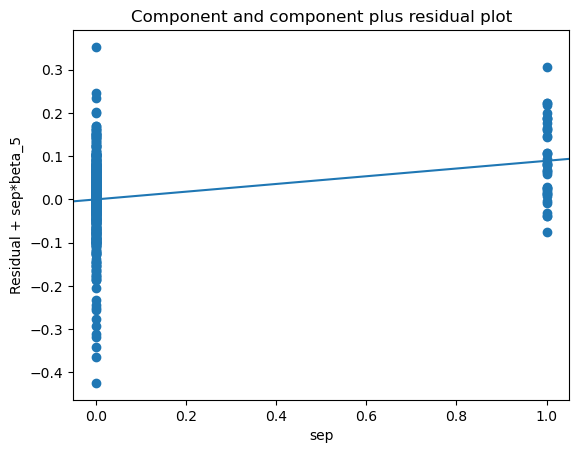

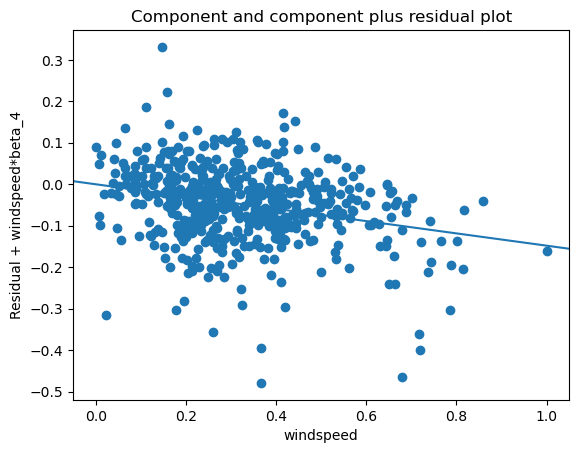

In [77]:
#Checking Linearity
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_5, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()

**Insight:** From these graphs we can see that there is some linearity

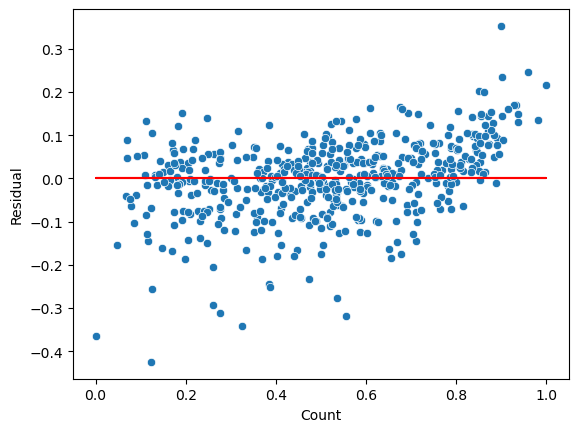

In [78]:
#Homoscedasticity
y_train_pred = lr_5.predict(X_train_lm_5)
residual = y_train - y_train_pred
sns.scatterplot(x = y_train, y = residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

**Insight:** No pattern observed from above plot for residuals.

### Step:8 Making Predictions Using the Final Model

In [79]:
df_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,19.509153,23.45270,73.3750,11.666643,6606,0,1,...,0,0,0,1,0,0,0,0,0,1
127,0,0,0,21.661653,25.94665,63.1667,5.000712,4333,0,0,...,0,1,0,0,0,0,0,0,1,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,...,0,0,0,0,1,0,1,0,0,1
72,0,0,1,13.333897,16.60000,49.6957,9.174042,2046,0,0,...,0,0,0,0,0,0,0,1,0,0


In [80]:
# Applying scaling on the test dataset
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [81]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
y_test = df_test.pop('cnt')

In [83]:
X_test = df_test

In [84]:
X_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0,1,0,...,0,0,0,1,0,0,0,0,0,1
127,0,0,0,0.584649,0.577380,0.650923,0.069510,0,0,0,...,0,1,0,0,0,0,0,0,1,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0,0,0,...,0,0,0,0,1,0,1,0,0,1
72,0,0,1,0.331557,0.332005,0.512107,0.203418,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [85]:
col1 = X_train_new.columns

In [86]:
col1

Index(['yr', 'holiday', 'temp', 'windspeed', 'sep', 'sun', 'Light_snowrain',
       'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [87]:
X_test = X_test[col1]

In [88]:
# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [89]:
X_test

,yr,holiday,temp,windspeed,sep,sun,Light_snowrain,Misty,spring,summer,winter
184,0,1,0.831783,0.084219,0,0,0,1,0,0,0
535,1,0,0.901354,0.153728,0,0,0,0,0,1,0
299,0,0,0.511964,0.334206,0,0,0,1,0,0,1
221,0,0,0.881625,0.339570,0,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,0.519232,0.283397,0,0,0,0,0,0,1
127,0,0,0.584649,0.069510,0,1,0,0,0,1,0
640,1,0,0.745598,0.052115,0,0,0,1,0,0,1
72,0,0,0.331557,0.203418,0,0,0,0,1,0,0


In [90]:
y_pred = lr_5.predict(X_test_lm_5)

In [91]:
# Calculating R^2 value for the test dataset
r2 = r2_score(y_test, y_pred)

print(f'R2 Score: {r2}')

R2 Score: 0.806560397095367


### Step:9 Model Evaluation

Text(0, 0.5, 'y_pred')

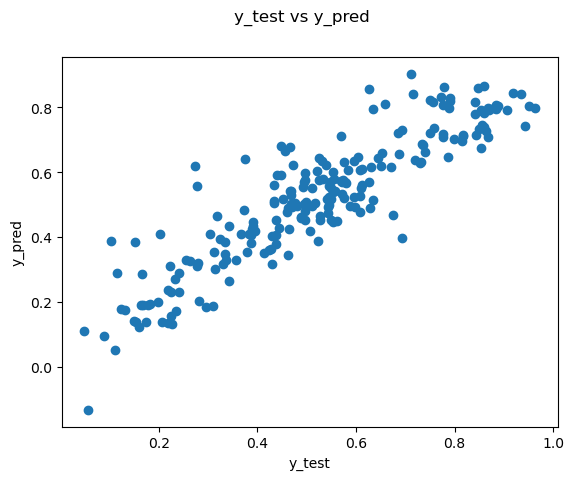

In [92]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred') 
plt.xlabel('y_test')
plt.ylabel('y_pred') 

In [93]:
round(lr_5.params,4)

const             0.1981
yr                0.2340
holiday          -0.1043
temp              0.4782
windspeed        -0.1480
sep               0.0894
sun              -0.0495
Light_snowrain   -0.2904
Misty            -0.0809
spring           -0.0544
summer            0.0623
winter            0.0969
dtype: float64

In [94]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7963


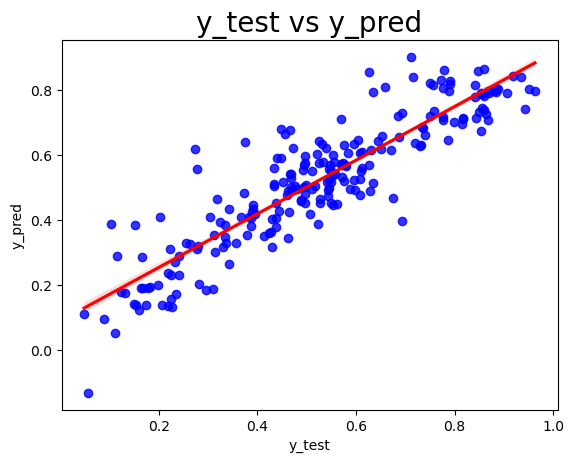

In [95]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

### Comparision between Training and Testing dataset:

1. Train dataset R^2          :  0.839
2. Test dataset R^2           :  0.807
3. Train dataset Adjusted R^2 :  0.835    
4. Test dataset Adjusted R^2  :  0.0.796

#### Demand of bikes depend on year, holiday, temp, windspeed, sep, sun, Light_snowrain, Misty, spring, summer and winter.